In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
from scipy.signal import find_peaks
matplotlib.style.use("dark_background")
from IPython.display import display, Markdown

In [2]:
sun = pd.read_csv("Sunspots.csv", names = ["S.No.", 
                                          "Date", "Number"], header = 0)
def to_ordinal(date):
    lis = list(map(int, date.split('-')))
    return dt.datetime(*lis).toordinal()

sun["DD/MM/YYYY"] =  sun["Date"]
sun["Date"] = (sun["Date"].apply(to_ordinal)).to_numpy() - ((sun["Date"].apply(to_ordinal)).to_numpy())[0] + 1

display(sun)

,S.No.,Date,Number,DD/MM/YYYY
0,0,1,96.7,1749-01-31
1,1,29,104.3,1749-02-28
2,2,60,116.7,1749-03-31
3,3,90,92.8,1749-04-30
4,4,121,141.7,1749-05-31
...,...,...,...,...
3247,3247,98828,0.5,2019-08-31
3248,3248,98858,1.1,2019-09-30
3249,3249,98889,0.4,2019-10-31
3250,3250,98919,0.5,2019-11-30


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

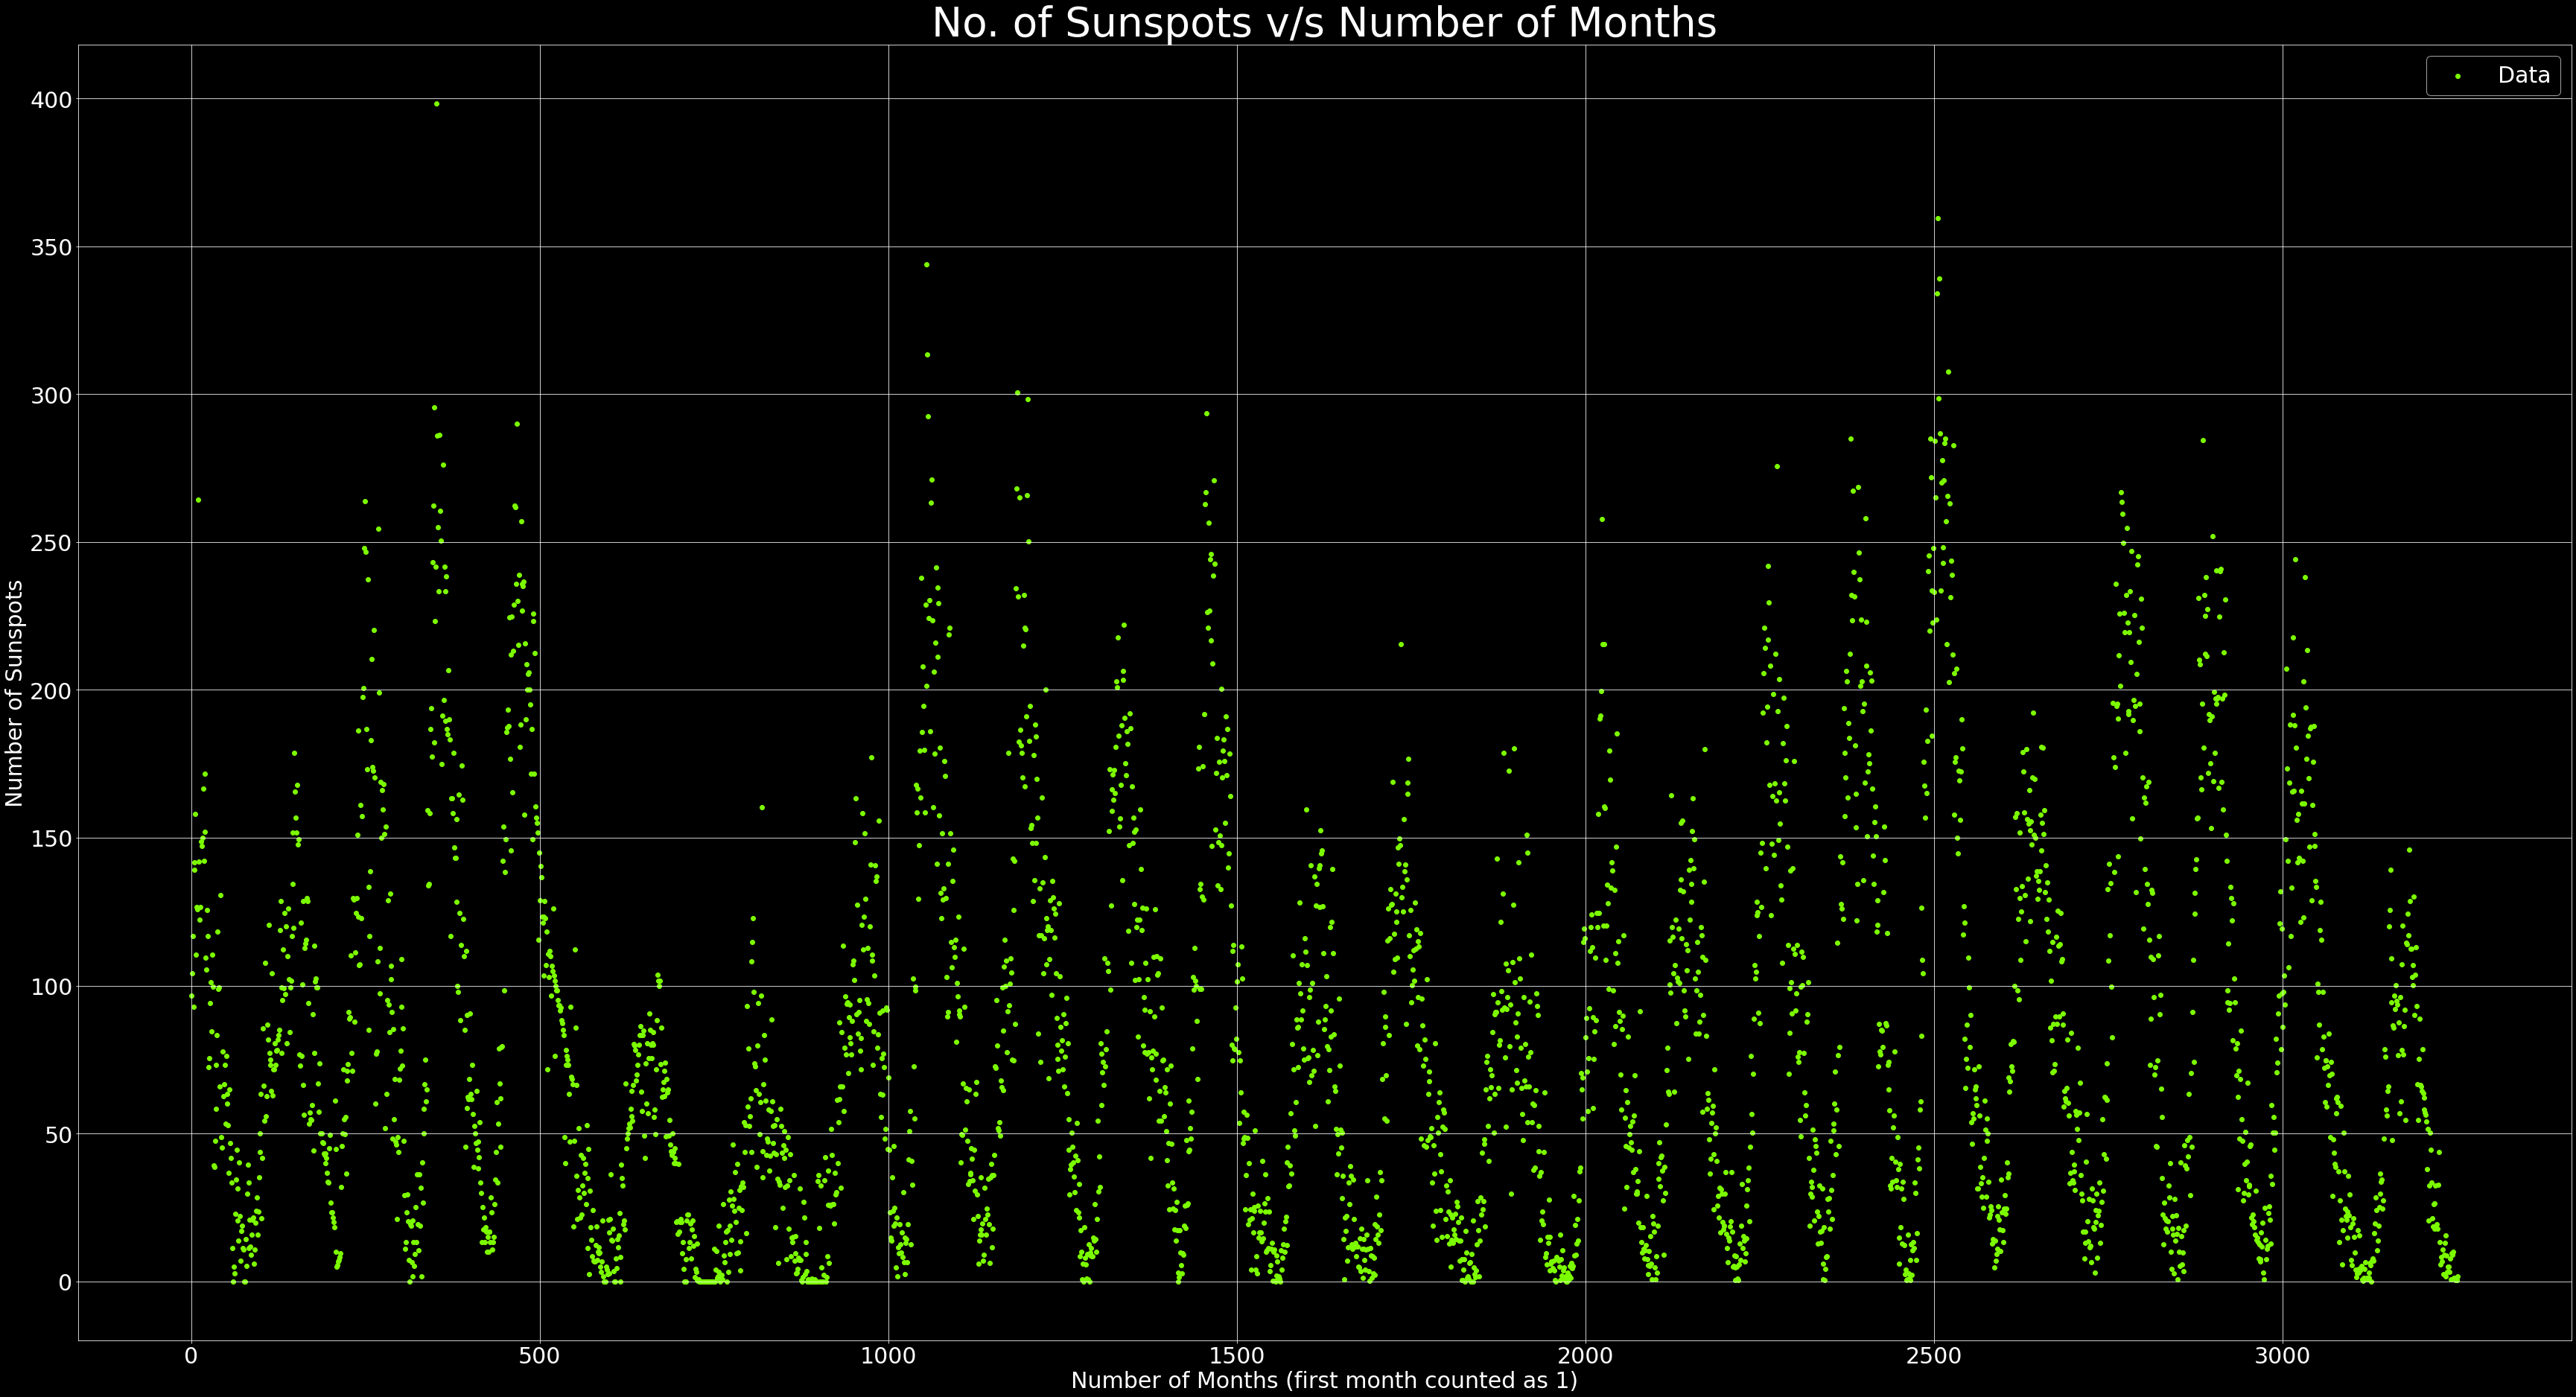

In [3]:
plt.figure(figsize = [2*30, 2*16])
plt.scatter([_ for _ in range(sun["Number"].size)], sun["Number"],
            linewidth = 1, color = "lawngreen", label = "Data")

plt.grid(True)
plt.legend(prop={'size': 30})
plt.xlabel("Number of Months (first month counted as 1)", fontsize = 30)
plt.ylabel("Number of Sunspots", fontsize = 30)
plt.title("No. of Sunspots v/s Number of Months", fontsize = 55)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

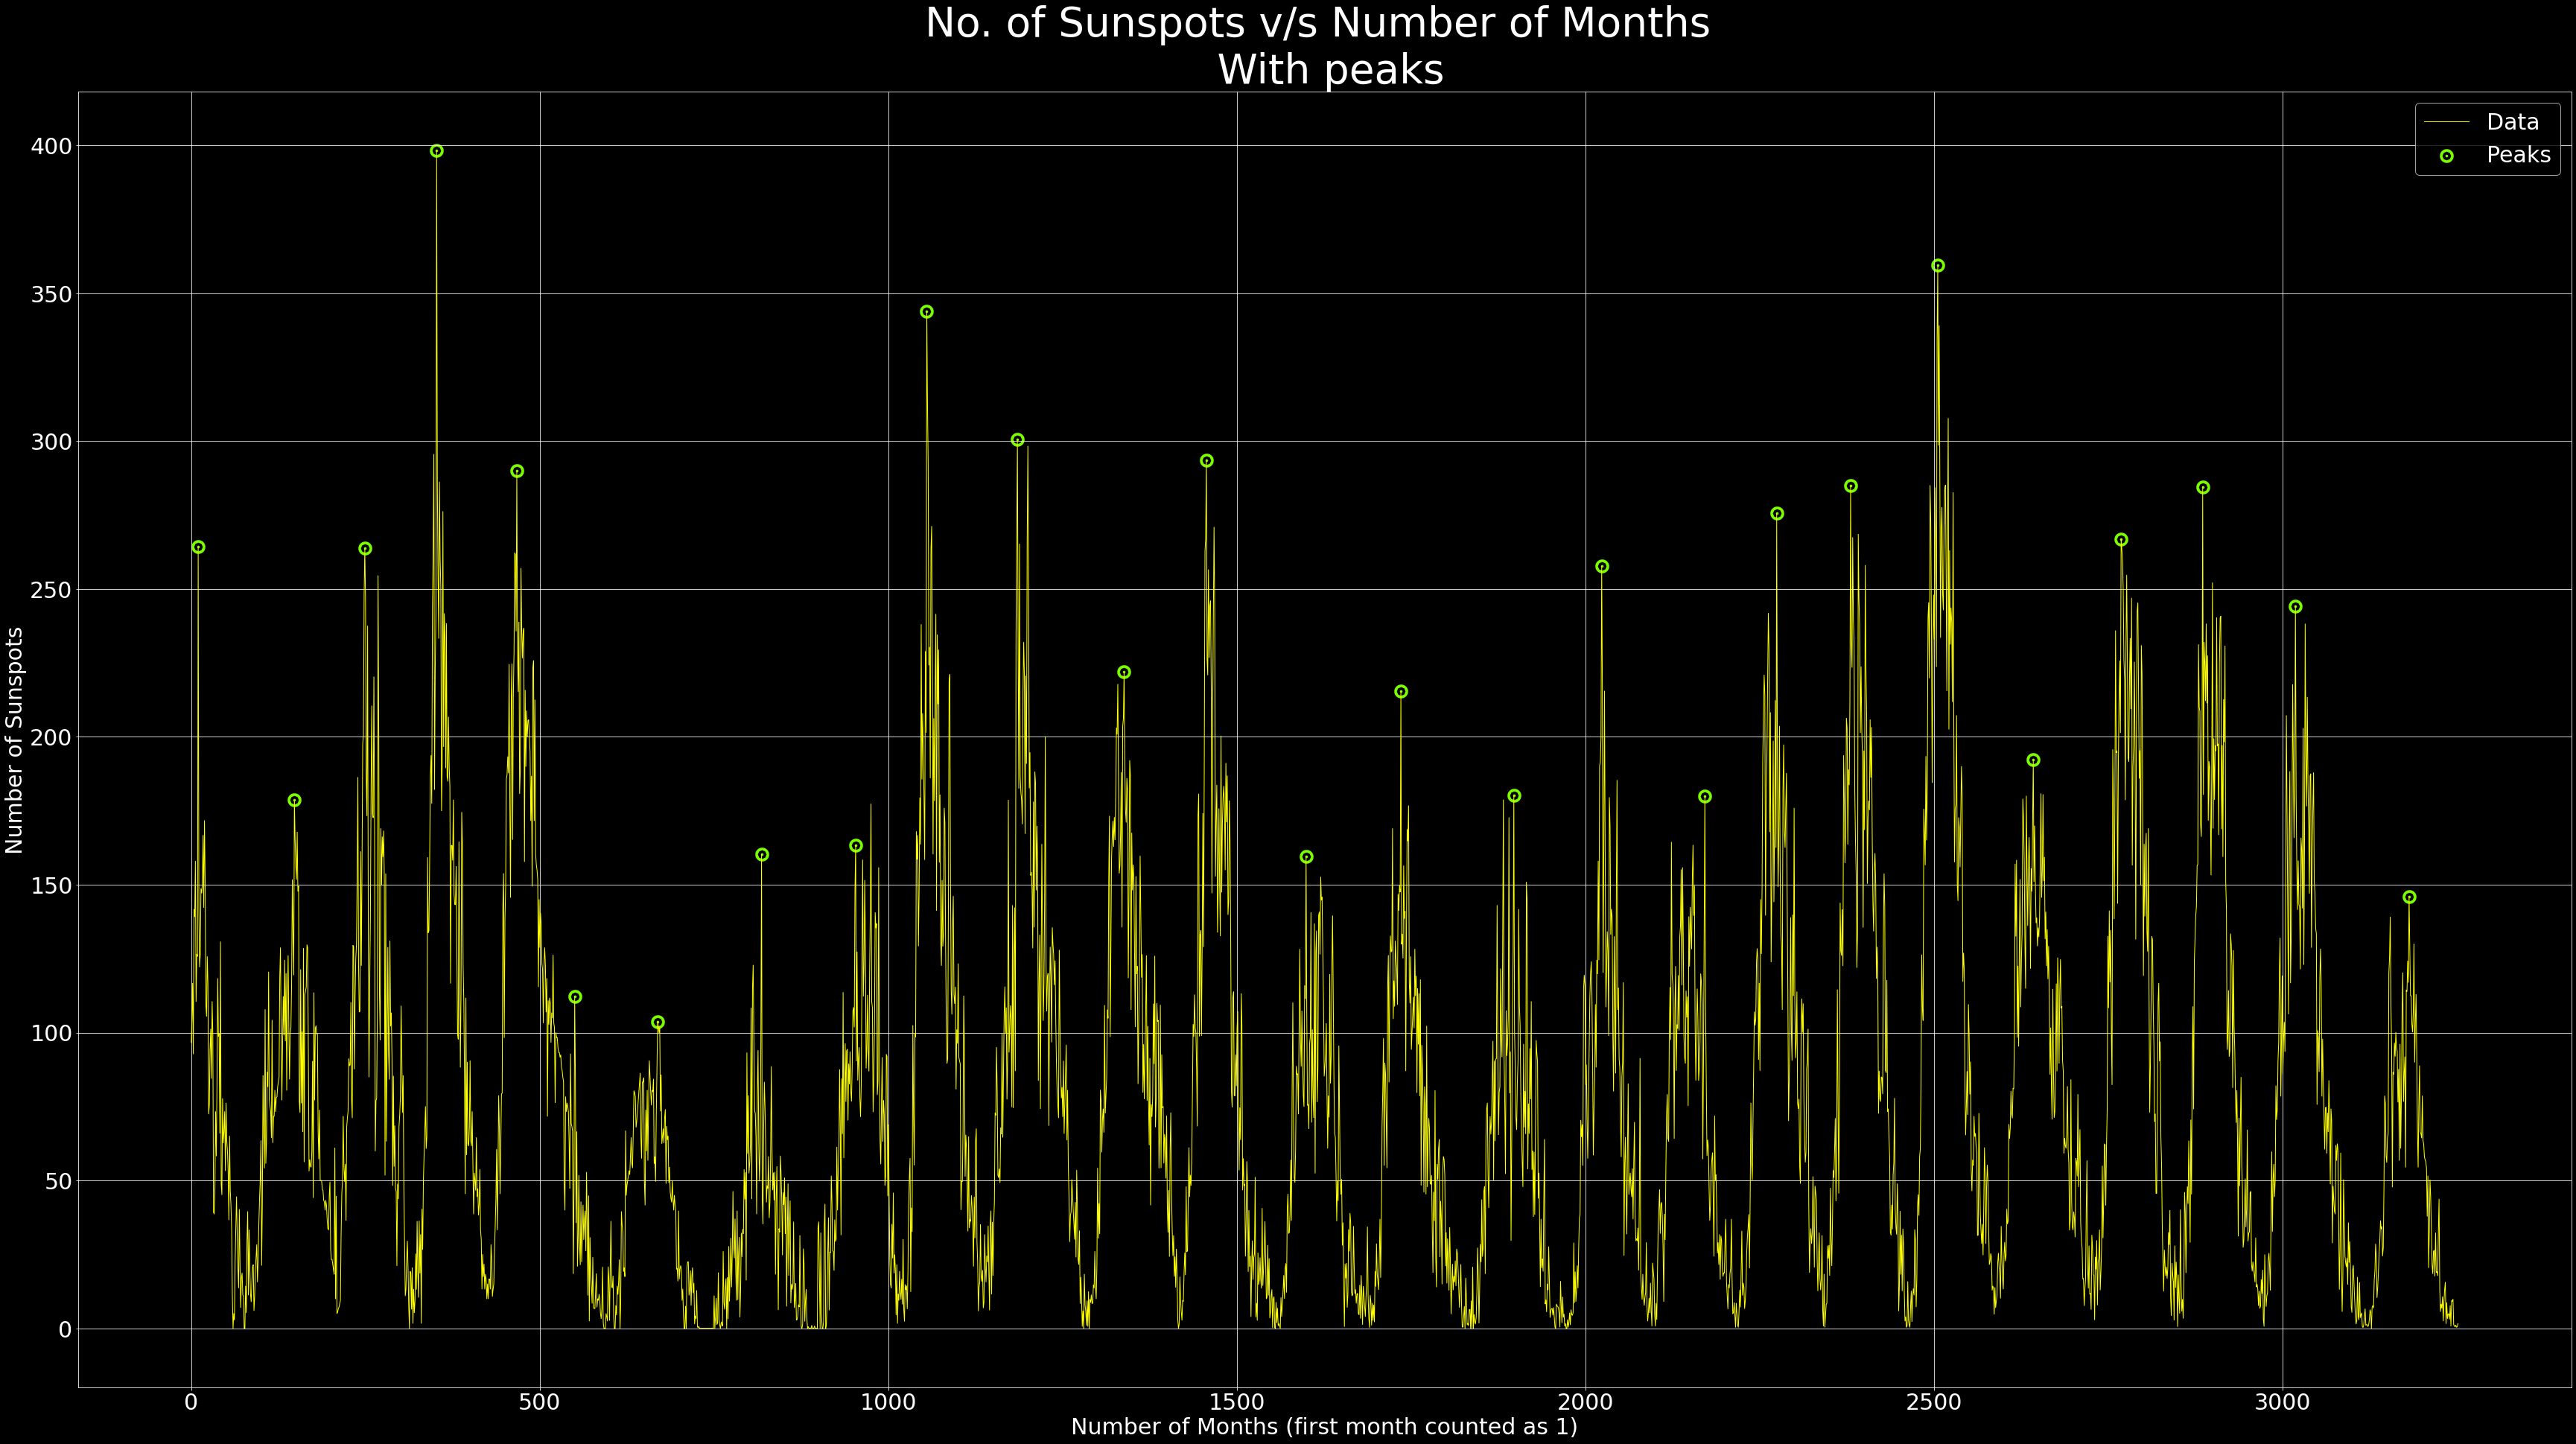

In [4]:
plt.figure(figsize = [2*30, 2*16])
plt.plot([_ for _ in range(sun["Number"].size)], sun["Number"],
            linewidth = 1, color = "#ffff00", label = "Data")

peaks, _ = find_peaks(sun["Number"].to_numpy(), distance = 82)

plt.scatter(peaks, (sun["Number"].to_numpy())[peaks],
            s = 13, color = "lawngreen", label = "Peaks", linewidths = 15)
plt.grid(True)
plt.legend(prop={'size': 30})
plt.xlabel("Number of Months (first month counted as 1)", fontsize = 30)
plt.ylabel("Number of Sunspots", fontsize = 30)
plt.title("No. of Sunspots v/s Number of Months \n With peaks", fontsize = 55)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
#plt.savefig("sunspot.svg", dpi = 600)

In [5]:
def find(array, text, num = 5):
    index = np.array([])
    _ = array.copy()
    array.sort()
    if text.lower() == "low":
        for i in range(num):
            index = np.append(index, np.where(_ == array[i]))
    elif text.lower() == "high":
        array = np.flip(array)
        for i in range(num):
            index = np.append(index, np.where(_ == array[i]))
    return array[:num], index


low_max5, pos1 = find((sun["Number"].to_numpy())[peaks], text = "low")
high_max5, pos2 = find((sun["Number"].to_numpy())[peaks], text = "high")

display(Markdown("The lowest maxima in the history"))
print("      Date", "--> ", "No. of Sunspots")
for i in range(low_max5.size):
    date = (sun[sun["Number"] == low_max5[i]])["DD/MM/YYYY"].to_numpy()[0]
    print(date, "--> ", low_max5[i])
    
print("----------------------------------")
    
display(Markdown("The highest maxima in the history"))
print("      Date", "--> ", "No. of Sunspots")
for i in range(high_max5.size):
    date = (sun[sun["Number"] == high_max5[i]])["DD/MM/YYYY"].to_numpy()[0]
    print(date, "--> ", high_max5[i])

The lowest maxima in the history

      Date -->  No. of Sunspots
1804-10-31 -->  103.8
1794-11-30 -->  112.3
1840-02-29 -->  146.1
1882-04-30 -->  159.6
1817-03-31 -->  160.3
----------------------------------


The highest maxima in the history

      Date -->  No. of Sunspots
1778-05-31 -->  398.2
1957-10-31 -->  359.4
1836-12-31 -->  343.8
1847-10-31 -->  300.6
1870-05-31 -->  293.6


In [6]:
display(Markdown("Avg. sunspots around peaks"))
print("      Date", "--> ", "No. of Sunspots")

peaks_ = (sun["Number"].to_numpy())[peaks]
for i in range(peaks.size):
    date = (sun[sun["S.No."] == peaks[i]])["DD/MM/YYYY"].to_numpy()[0]
    print(date, "--> ", (sun["Number"].to_numpy())[peaks[i]])
    
display(Markdown("**Total average of sunspots near maxima is:** {:.3f}".format(\
                                                                               np.mean((sun["Number"].to_numpy())[peaks]))))

Avg. sunspots around peaks

      Date -->  No. of Sunspots
1749-11-30 -->  264.3
1761-05-31 -->  178.7
1769-10-31 -->  263.7
1778-05-31 -->  398.2
1787-12-31 -->  290.0
1794-11-30 -->  112.3
1804-10-31 -->  103.8
1817-03-31 -->  160.3
1828-06-30 -->  163.4
1836-12-31 -->  343.8
1847-10-31 -->  300.6
1860-07-31 -->  221.9
1870-05-31 -->  293.6
1882-04-30 -->  159.6
1893-08-31 -->  215.4
1907-02-28 -->  180.3
1917-08-31 -->  257.7
1929-12-31 -->  179.9
1938-07-31 -->  275.6
1947-05-31 -->  285.0
1957-10-31 -->  359.4
1969-03-31 -->  192.3
1979-09-30 -->  266.9
1989-06-30 -->  284.5
2000-07-31 -->  244.3
2014-02-28 -->  146.1


**Total average of sunspots near maxima is:** 236.215